Tasks:

1.   //
2.   Import the three datasets (training, validation and test) into a google colab and analyze your given data set. Your target variable will be "discr_r".
3.   Generate a Linear Regression model as a benchmark and evaluate it (for comparison the mean absolute error as a performance metric is suggested). 
4.   Generate a neural network with an arbitrary choice of hyperparameters in order to perform a comparable task to the linear regression model and evaluate it. 
5.   Compare the feature importance for the benchmark and the baseline neural network.
6.   Perform hyperparameter tuning with Optuna in order to generate a better performing neural network. 
7.   Evaluate its results and compare them as well as the feature importance to the benchmark and the baseline neural network. 
8.   Describe your results for all three models and explain what your results means with respect to $(R_{Mt} - R_{ft})$ , SMB and HML. 

## Step **2**

In [ ]:
# upload files from local
from google.colab import files
uploaded = files.upload()

Saving test_data.csv to test_data.csv
Saving train_data.csv to train_data.csv
Saving validation_data.csv to validation_data.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import io

## assigment data from csv
train_df = pd.read_csv(io.BytesIO(uploaded['train_data.csv']))
val_df = pd.read_csv(io.BytesIO(uploaded['validation_data.csv']))
test_df = pd.read_csv(io.BytesIO(uploaded['test_data.csv']))

## set date to index
train_df = train_df.rename(columns={"Unnamed: 0": "date"}).set_index(['date'], drop=True)
val_df = val_df.rename(columns={"Unnamed: 0": "date"}).set_index(['date'], drop=True)
test_df = test_df.rename(columns={"Unnamed: 0": "date"}).set_index(['date'], drop=True)


In [ ]:
train_df.info()
print("\n")
val_df.info()
print("\n")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4302 entries, 2019-06-30 to 2019-06-30
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_to_market  4302 non-null   float64
 1   market_cap      4302 non-null   float64
 2   beta            4302 non-null   float64
 3   discr_r         4302 non-null   float64
dtypes: float64(4)
memory usage: 168.0+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 4335 entries, 2019-07-31 to 2019-07-31
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_to_market  4335 non-null   float64
 1   market_cap      4335 non-null   float64
 2   beta            4335 non-null   float64
 3   discr_r         4335 non-null   float64
dtypes: float64(4)
memory usage: 169.3+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 4348 entries, 2019-08-31 to 2019-08-31
Data columns (total 4 columns):
 #   Column          N

#####We have confirmed that there is no outlier Dtype. Therefore, no need to do any conversion.
#####There is no row with a null value.


#####In the next step, we will examine the correlation between columns.
*   If the correlation value for two columns is close to 1, it is expected that the data in this column will affect each other negatively-positively.







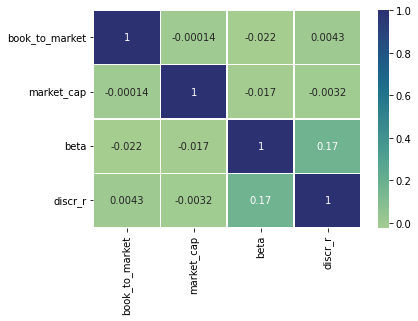

In [ ]:
## train data correlations
sns.heatmap(train_df.corr(), cmap="crest", annot=True, linewidth=.5)
# There is a possitive weak correlation between beta and discr_r (target). 
# There is a negative very weak correlation between market_cap and discr_r (target). 
# There is a possitive very weak correlation between book_to_market and discr_r (target).

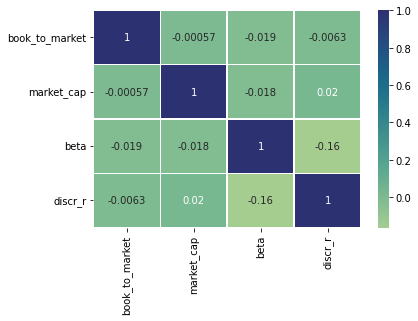

In [ ]:
##test data correlations
sns.heatmap(test_df.corr(), cmap="crest", annot=True, linewidth=.5)
# There is a negative weak correlation between beta and discr_r (target). 
# There is a positive very weak correlation between market_cap and discr_r (target). 
# There is a negative very weak correlation between book_to_market and discr_r (target).

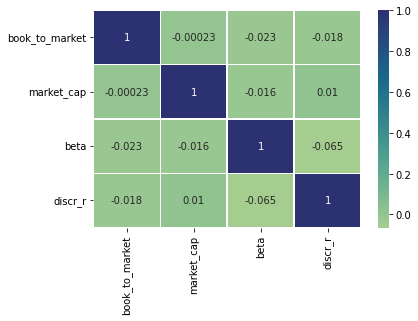

In [ ]:
##val_df data correlations
sns.heatmap(val_df.corr(), cmap="crest", annot=True, linewidth=.5)
# There is a negative very weak correlation between beta and discr_r (target). 
# There is a positive very weak correlation between market_cap and discr_r (target). 
# There is a negative very weak correlation between book_to_market and discr_r (target).

In [ ]:
#define train,val,test variables and target
X_train = train_df[["book_to_market","market_cap","beta"]]
y_train = train_df["discr_r"]

X_val = val_df[["book_to_market","market_cap","beta"]]
y_val = val_df["discr_r"]

X_test = test_df[["book_to_market","market_cap","beta"]]
y_test = test_df["discr_r"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s, X_test_s, X_val_s = scaler.transform(X_train), scaler.transform(X_test), scaler.transform(X_val)

# step 3

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train the model on the training data
log_reg = LinearRegression()
log_reg.fit(X_train_s, y_train)

# Make predictions on the test data
y_test_pred = log_reg.predict(X_test_s)

### Mean-Absolute-Error

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate the mean squared error
lr_mae = mean_absolute_error(y_test_pred, y_test)   

print(lr_mae)

0.13710582505046462


In [ ]:
lr_r2_score = r2_score(y_test, y_test_pred)
print(f'Test R2 score:{lr_r2_score:.4f}')


Test R2 score:-0.4750


Text(0, 0.5, 'realizations')

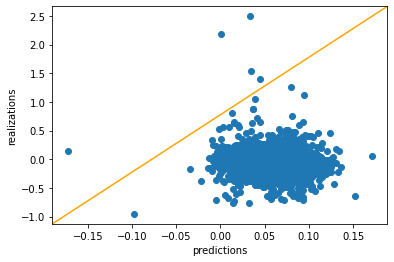

In [ ]:
fig,axs = plt.subplots()
axs.scatter(y_test_pred,y_test)
axs.plot([0,1],[0,1], transform=axs.transAxes, c="orange")
axs.set_xlabel("predictions")
axs.set_ylabel("realizations")

# step 4

In [ ]:
output_fun = 'linear'

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Input

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_s.shape[1])),
    tf.keras.layers.Dense(20, activation='tanh', name='hidden_layer_1'),
    tf.keras.layers.Dense(20, activation='tanh', name='hidden_layer_2'),
    tf.keras.layers.Dense(10, activation='tanh', name='hidden_layer_3'),
    tf.keras.layers.Dense(5, activation='tanh', name='hidden_layer_4'),
    tf.keras.layers.Dense(1, activation=output_fun)
])

model.compile(loss='mean_squared_error', optimizer= "RMSprop")
history_nn = model.fit(X_train_s, 
          y_train, 
          epochs = 25,
          validation_data=(X_val_s, y_val))

Epoch 1/25
135/135 [==============================] - 3s 8ms/step - loss: 0.0431 - val_loss: 0.0223
Epoch 2/25
135/135 [==============================] - 0s 3ms/step - loss: 0.0213 - val_loss: 0.0211
Epoch 3/25
135/135 [==============================] - 0s 3ms/step - loss: 0.0210 - val_loss: 0.0259
Epoch 4/25
135/135 [==============================] - 1s 4ms/step - loss: 0.0211 - val_loss: 0.0221
Epoch 5/25
135/135 [==============================] - 1s 4ms/step - loss: 0.0209 - val_loss: 0.0250
Epoch 6/25
135/135 [==============================] - 0s 4ms/step - loss: 0.0209 - val_loss: 0.0219
Epoch 7/25
135/135 [==============================] - 1s 5ms/step - loss: 0.0209 - val_loss: 0.0215
Epoch 8/25
135/135 [==============================] - 1s 5ms/step - loss: 0.0209 - val_loss: 0.0252
Epoch 9/25
135/135 [==============================] - 0s 3ms/step - loss: 0.0209 - val_loss: 0.0227
Epoch 10/25
135/135 [==============================] - 0s 3ms/step - loss: 0.0209 - val_loss: 0.0227

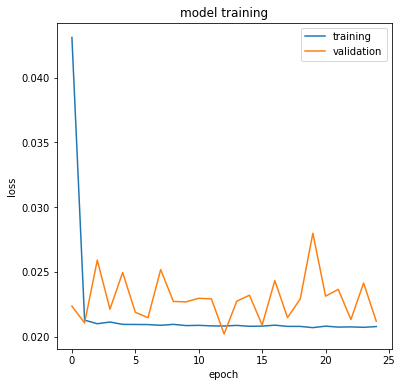

In [ ]:
fig = plt.figure(figsize=(6,6))

# summarize history for loss
plt.plot(history_nn.history['loss'], label="training")
plt.plot(history_nn.history['val_loss'], label="validation")
plt.title('model training')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

### Mean-Absolute-Error

In [ ]:
y_nn_test_pred = model.predict(X_test_s)
nn_mae = mean_absolute_error(y_nn_test_pred, y_test)
print(nn_mae)

136/136 [==============================] - 0s 1ms/step
0.13058082382271863


In [ ]:
nn_r2_score = r2_score(y_test, y_nn_test_pred)
print(f'Test R2 score:{nn_r2_score:.4f}')

Test R2 score:-0.3843


Text(0, 0.5, 'realizations')

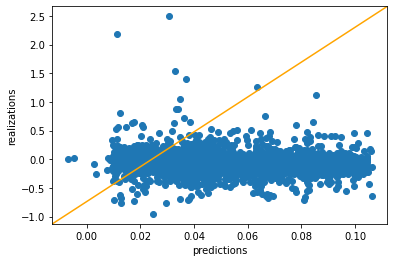

In [ ]:
fig,axs = plt.subplots()
axs.scatter(y_nn_test_pred,y_test)
axs.plot([0,1],[0,1], transform=axs.transAxes, c="orange")
axs.set_xlabel("predictions")
axs.set_ylabel("realizations")

Compare **mean absolute error of neural network** and  **mean absolute error of linear regression**. (Closer to 0 is a better result.)

In [ ]:
print("mean_absolute_error of neural network: " + str(nn_mae)+ "\n")
print("mean_absolute_error of linear regression: " + str(lr_mae))

mean_absolute_error of neural network: 0.13058082382271863

mean_absolute_error of linear regression: 0.13710582505046462


####Result of Step 4
1.   Both models are well-trained and return results with a low margin of error.
2.   The neural network model gives better result than the linear regression model.




# Step 5

### Feature Importance
####Define the feature_analysis

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import mode

# a function for feature analysis
def feature_analysis(X, nn, feature_names):
    # determine first and second partial derivatives
    with tf.GradientTape() as snd:
        snd.watch(X)
        with tf.GradientTape() as fst:
            fst.watch(X)
            # prediction with the neural network, i.e., f(X)
            pred = nn(X)
        # gradient
        g = fst.gradient(pred, X)
    # jacobian which outputs Hessian matrix
    h = snd.batch_jacobian(g, X)

    # first partial derivatives
    g_np = g.numpy()
    # average squard partial derivatives
    g_mag_sq = (g_np**2).mean(axis = 0)
    # square root of average squard partial derivatives
    g_mag = np.sqrt(g_mag_sq)
    # sign of average partial derivatives
    g_dir = np.sign(g_np.mean(axis = 0))

    # normalizing constant
    C_ = np.sum(g_mag)
    # normalized feature importance with sign
    fi = (g_mag * g_dir) / C_

    # get signs of each sample
    fi_signs = np.sign(g_np)
    # the mode is the sign which can be observed most often among all samples, the counts is how often this sign is observed
    fi_modes, fi_counts = mode(fi_signs)
    # dividing the count of the sign which is observed most often by the overall sample size gives us a frequency measure
    # which is closer to one, the higher the conformity of the sign
    fi_conformity = fi_counts / g_np.shape[0] #fi_modes * 

    # in analogy to the calculation above, we do the same thing with the second partial derivatives
    h_np = h.numpy()
    # get the square root of average squared direction of curvature and interactions
    h_mag_sq = (h_np**2).mean(axis = 0)
    h_mag = np.sqrt(h_mag_sq)

    # the the sign of average curvature and interactions
    h_dir = np.sign(h_np.mean(axis = 0))

    # normalize the values on the diagonal line to compare the degree of non-linearity
    C_nonlin = np.sum(h_mag.diagonal())
    nonlinearity = (h_dir.diagonal() * h_mag.diagonal()) / C_nonlin

    # normlize the interactions
    lti = np.tril_indices(h_mag.shape[0], k = -1)
    C_ia = np.sum(h_mag[lti])
    interactions = (h_mag[lti] * h_dir[lti]) / C_ia

    # bring curvature and interaction effects back to matrix format
    snd_degree_summary = np.diag(nonlinearity)
    a, b = lti
    inter_iter = iter(interactions)
    for i, j in zip(a, b):
        snd_degree_summary[i, j] = next(inter_iter)
        snd_degree_summary[j, i] = snd_degree_summary[i, j]

    # get the conformity of second order effects
    snd_signs = np.sign(h_np)
    snd_degree_modes, snd_degreee_counts = mode(snd_signs)
    snd_degree_conformity = snd_degreee_counts / h_np.shape[0] #snd_degree_modes * 

    # finally summarize feature importances and second order effects
    summary = pd.DataFrame(data = snd_degree_summary, index = feature_names, columns = feature_names)
    summary.loc[:, 'feature_importance'] = fi
    # as well as their conformity
    summary_conformity = pd.DataFrame(data = snd_degree_conformity.reshape(h_np.shape[1], h_np.shape[2]), index = feature_names, columns = feature_names)
    summary_conformity.loc[:, 'feature_importance'] = fi_conformity.flatten()

    return summary, summary_conformity

In [ ]:
X_test_tensor = tf.Variable(X_test_s)
sum_test_nn, sum_c_test_nn = feature_analysis(X_test_tensor, model, X_test.columns)

In [ ]:
sum_test_nn["feature_importance"]

book_to_market   -0.300961
market_cap        0.516052
beta              0.182986
Name: feature_importance, dtype: float64

In [ ]:
sum_c_test_nn

,book_to_market,market_cap,beta,feature_importance
book_to_market,0.583027,0.619135,0.609476,0.990340
market_cap,0.619135,0.637305,0.586707,0.971251
beta,0.609476,0.586707,0.548068,0.997470


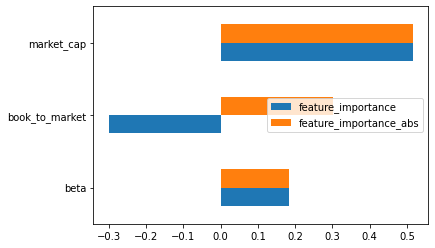

In [ ]:
fi = pd.DataFrame(sum_test_nn["feature_importance"])
fi.loc[:, "feature_importance_abs"] = fi.feature_importance.abs()
fi.sort_values(by="feature_importance_abs", ascending=True, inplace =True)
fi.plot.barh()

####linear regression feature importance

In [ ]:
importance = log_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('%s, Score: %.5f' % (X_train.columns[i],v))


book_to_market, Score: 0.00118
market_cap, Score: -0.00005
beta, Score: 0.02529


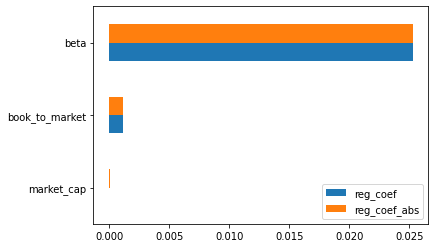

In [ ]:
log_reg_coef = pd.DataFrame(data = log_reg.coef_.flatten(), index = X_train.columns, columns=["reg_coef"])
log_reg_coef.loc[:, 'reg_coef_abs'] = log_reg_coef.reg_coef.abs()
log_reg_coef.sort_values(by="reg_coef_abs", ascending= True, inplace = True)
log_reg_coef.plot.barh()


# Step 6

###Install optuna

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 5.4 MB/s 
     |████████████████████████████████| 81 kB 9.9 MB/s 
     |████████████████████████████████| 210 kB 55.3 MB/s 
     |████████████████████████████████| 78 kB 8.1 MB/s 
     |████████████████████████████████| 147 kB 78.3 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 
     |████████████████████████████████| 112 kB 31.1 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=dafecea2299549477cc6d5dee3687a1fb93bc8ac301fedf14885bdbe1441dc64
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 5.1.0
    Uninstalling importlib-metadata-5.1.0:
      Successfully uninstalled importlib-metadata-5.1.0


###Define method "objective"

In [ ]:
import optuna

def objective(trial):
  n_layers = trial.suggest_int('n_layers',1,3)
  my_model = tf.keras.Sequential()
  my_model.add(tf.keras.layers.InputLayer(input_shape = X_train_s.shape[1]))

  for i in range(n_layers):
    num_hidden = trial.suggest_int(f'n_units_l{i}', 4, 128, log=True)
    a_fun = trial.suggest_categorical(f'a_fun_l{i}', ['tanh','sigmoid','relu'])
    my_model.add(tf.keras.layers.Dense(num_hidden, activation=a_fun))

  my_model.add(tf.keras.layers.Dense(1, activation = output_fun))
  loss_fun = trial.suggest_categorical(f'loss_fun', ["mean_squared_error","mean_absolute_error","huber_loss"])
  optim= trial.suggest_categorical(f'optimizer', ["Adam","RMSprop"])

  my_model.compile(loss = loss_fun, optimizer=optim)

  call_back_patience = trial.suggest_int(f'callback_patience',1,5)
  my_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = call_back_patience)

  n_epochs = trial.suggest_int(f'training_epochs',10,100)
  my_model.fit(X_train_s, y_train, epochs = n_epochs, validation_data=(X_test_s, y_test), callbacks = [my_callback], verbose=0)

  y_test_pred = my_model.predict(X_test_s).flatten()
  r2_test = r2_score(y_test,y_test_pred)
  return r2_test

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials = 20 )

[I 2022-12-21 05:43:04,225] A new study created in memory with name: no-name-c3d51710-321a-45e2-b889-ad18e0a6434d


136/136 [==============================] - 0s 2ms/step


[I 2022-12-21 05:43:15,779] Trial 0 finished with value: -0.4069961263015558 and parameters: {'n_layers': 1, 'n_units_l0': 45, 'a_fun_l0': 'sigmoid', 'loss_fun': 'huber_loss', 'optimizer': 'RMSprop', 'callback_patience': 3, 'training_epochs': 59}. Best is trial 0 with value: -0.4069961263015558.


136/136 [==============================] - 1s 3ms/step


[I 2022-12-21 05:43:22,169] Trial 1 finished with value: -0.4624729894250661 and parameters: {'n_layers': 3, 'n_units_l0': 25, 'a_fun_l0': 'tanh', 'n_units_l1': 17, 'a_fun_l1': 'tanh', 'n_units_l2': 11, 'a_fun_l2': 'relu', 'loss_fun': 'mean_squared_error', 'optimizer': 'Adam', 'callback_patience': 4, 'training_epochs': 77}. Best is trial 0 with value: -0.4069961263015558.


136/136 [==============================] - 1s 3ms/step


[I 2022-12-21 05:43:29,277] Trial 2 finished with value: -0.37012038329694175 and parameters: {'n_layers': 2, 'n_units_l0': 38, 'a_fun_l0': 'tanh', 'n_units_l1': 10, 'a_fun_l1': 'relu', 'loss_fun': 'mean_squared_error', 'optimizer': 'RMSprop', 'callback_patience': 2, 'training_epochs': 12}. Best is trial 2 with value: -0.37012038329694175.


136/136 [==============================] - 0s 3ms/step


[I 2022-12-21 05:43:41,143] Trial 3 finished with value: -0.527973061010137 and parameters: {'n_layers': 2, 'n_units_l0': 7, 'a_fun_l0': 'tanh', 'n_units_l1': 11, 'a_fun_l1': 'relu', 'loss_fun': 'mean_squared_error', 'optimizer': 'Adam', 'callback_patience': 3, 'training_epochs': 96}. Best is trial 2 with value: -0.37012038329694175.


136/136 [==============================] - 0s 1ms/step


[I 2022-12-21 05:43:44,998] Trial 4 finished with value: -0.4772370959614305 and parameters: {'n_layers': 3, 'n_units_l0': 35, 'a_fun_l0': 'sigmoid', 'n_units_l1': 23, 'a_fun_l1': 'sigmoid', 'n_units_l2': 10, 'a_fun_l2': 'sigmoid', 'loss_fun': 'mean_squared_error', 'optimizer': 'Adam', 'callback_patience': 3, 'training_epochs': 78}. Best is trial 2 with value: -0.37012038329694175.


136/136 [==============================] - 0s 1ms/step


[I 2022-12-21 05:43:49,276] Trial 5 finished with value: -0.4332240167493917 and parameters: {'n_layers': 2, 'n_units_l0': 8, 'a_fun_l0': 'relu', 'n_units_l1': 14, 'a_fun_l1': 'tanh', 'loss_fun': 'mean_squared_error', 'optimizer': 'Adam', 'callback_patience': 3, 'training_epochs': 62}. Best is trial 2 with value: -0.37012038329694175.


136/136 [==============================] - 0s 2ms/step


[I 2022-12-21 05:43:55,740] Trial 6 finished with value: -0.4885293094145702 and parameters: {'n_layers': 2, 'n_units_l0': 6, 'a_fun_l0': 'relu', 'n_units_l1': 49, 'a_fun_l1': 'tanh', 'loss_fun': 'huber_loss', 'optimizer': 'Adam', 'callback_patience': 3, 'training_epochs': 32}. Best is trial 2 with value: -0.37012038329694175.


136/136 [==============================] - 0s 1ms/step


[I 2022-12-21 05:44:02,200] Trial 7 finished with value: -0.5931244404062272 and parameters: {'n_layers': 2, 'n_units_l0': 8, 'a_fun_l0': 'relu', 'n_units_l1': 68, 'a_fun_l1': 'tanh', 'loss_fun': 'mean_absolute_error', 'optimizer': 'RMSprop', 'callback_patience': 5, 'training_epochs': 66}. Best is trial 2 with value: -0.37012038329694175.


136/136 [==============================] - 0s 1ms/step


[I 2022-12-21 05:44:04,602] Trial 8 finished with value: -0.7429512404817156 and parameters: {'n_layers': 2, 'n_units_l0': 42, 'a_fun_l0': 'sigmoid', 'n_units_l1': 14, 'a_fun_l1': 'sigmoid', 'loss_fun': 'huber_loss', 'optimizer': 'RMSprop', 'callback_patience': 1, 'training_epochs': 92}. Best is trial 2 with value: -0.37012038329694175.


136/136 [==============================] - 0s 1ms/step


[I 2022-12-21 05:44:10,665] Trial 9 finished with value: -0.521456076071924 and parameters: {'n_layers': 3, 'n_units_l0': 4, 'a_fun_l0': 'tanh', 'n_units_l1': 19, 'a_fun_l1': 'relu', 'n_units_l2': 42, 'a_fun_l2': 'relu', 'loss_fun': 'mean_squared_error', 'optimizer': 'Adam', 'callback_patience': 3, 'training_epochs': 22}. Best is trial 2 with value: -0.37012038329694175.


136/136 [==============================] - 0s 1ms/step


[I 2022-12-21 05:44:12,772] Trial 10 finished with value: -0.8146879959659172 and parameters: {'n_layers': 1, 'n_units_l0': 124, 'a_fun_l0': 'tanh', 'loss_fun': 'mean_absolute_error', 'optimizer': 'RMSprop', 'callback_patience': 1, 'training_epochs': 37}. Best is trial 2 with value: -0.37012038329694175.


136/136 [==============================] - 0s 1ms/step


[I 2022-12-21 05:44:16,359] Trial 11 finished with value: -0.5080772090129448 and parameters: {'n_layers': 1, 'n_units_l0': 63, 'a_fun_l0': 'sigmoid', 'loss_fun': 'huber_loss', 'optimizer': 'RMSprop', 'callback_patience': 2, 'training_epochs': 12}. Best is trial 2 with value: -0.37012038329694175.


136/136 [==============================] - 0s 1ms/step


[I 2022-12-21 05:44:19,925] Trial 12 finished with value: -0.418587256832025 and parameters: {'n_layers': 1, 'n_units_l0': 16, 'a_fun_l0': 'sigmoid', 'loss_fun': 'huber_loss', 'optimizer': 'RMSprop', 'callback_patience': 2, 'training_epochs': 44}. Best is trial 2 with value: -0.37012038329694175.


136/136 [==============================] - 0s 1ms/step


[I 2022-12-21 05:44:22,102] Trial 13 finished with value: -0.4383494290095271 and parameters: {'n_layers': 1, 'n_units_l0': 84, 'a_fun_l0': 'tanh', 'loss_fun': 'huber_loss', 'optimizer': 'RMSprop', 'callback_patience': 2, 'training_epochs': 51}. Best is trial 2 with value: -0.37012038329694175.


136/136 [==============================] - 0s 1ms/step


[I 2022-12-21 05:44:27,147] Trial 14 finished with value: -0.46702871282009406 and parameters: {'n_layers': 1, 'n_units_l0': 17, 'a_fun_l0': 'sigmoid', 'loss_fun': 'mean_absolute_error', 'optimizer': 'RMSprop', 'callback_patience': 4, 'training_epochs': 11}. Best is trial 2 with value: -0.37012038329694175.


136/136 [==============================] - 0s 1ms/step


[I 2022-12-21 05:44:33,884] Trial 15 finished with value: -0.35906717195610716 and parameters: {'n_layers': 1, 'n_units_l0': 49, 'a_fun_l0': 'tanh', 'loss_fun': 'huber_loss', 'optimizer': 'RMSprop', 'callback_patience': 4, 'training_epochs': 56}. Best is trial 15 with value: -0.35906717195610716.


136/136 [==============================] - 0s 2ms/step


[I 2022-12-21 05:44:41,353] Trial 16 finished with value: -0.539117359737707 and parameters: {'n_layers': 3, 'n_units_l0': 26, 'a_fun_l0': 'tanh', 'n_units_l1': 4, 'a_fun_l1': 'relu', 'n_units_l2': 87, 'a_fun_l2': 'tanh', 'loss_fun': 'mean_squared_error', 'optimizer': 'RMSprop', 'callback_patience': 5, 'training_epochs': 28}. Best is trial 15 with value: -0.35906717195610716.


136/136 [==============================] - 0s 2ms/step


[I 2022-12-21 05:44:44,493] Trial 17 finished with value: -0.4166321821991561 and parameters: {'n_layers': 2, 'n_units_l0': 68, 'a_fun_l0': 'tanh', 'n_units_l1': 5, 'a_fun_l1': 'relu', 'loss_fun': 'mean_squared_error', 'optimizer': 'RMSprop', 'callback_patience': 4, 'training_epochs': 48}. Best is trial 15 with value: -0.35906717195610716.


136/136 [==============================] - 1s 4ms/step


[I 2022-12-21 05:44:58,947] Trial 18 finished with value: -0.5354295907311524 and parameters: {'n_layers': 2, 'n_units_l0': 12, 'a_fun_l0': 'tanh', 'n_units_l1': 7, 'a_fun_l1': 'relu', 'loss_fun': 'huber_loss', 'optimizer': 'RMSprop', 'callback_patience': 2, 'training_epochs': 75}. Best is trial 15 with value: -0.35906717195610716.


136/136 [==============================] - 1s 5ms/step


[I 2022-12-21 05:45:09,875] Trial 19 finished with value: -0.4637415499371549 and parameters: {'n_layers': 1, 'n_units_l0': 118, 'a_fun_l0': 'tanh', 'loss_fun': 'mean_absolute_error', 'optimizer': 'RMSprop', 'callback_patience': 4, 'training_epochs': 21}. Best is trial 15 with value: -0.35906717195610716.


### Find best hparams and predict

In [ ]:
best_hparams = study.best_trial.params
print(best_hparams)

{'n_layers': 1, 'n_units_l0': 49, 'a_fun_l0': 'tanh', 'loss_fun': 'huber_loss', 'optimizer': 'RMSprop', 'callback_patience': 4, 'training_epochs': 56}


In [ ]:
best_hparams_iterator = iter(study.best_trial.params)

n_layers = best_hparams[next(best_hparams_iterator)]

my_model = tf.keras.Sequential()
my_model.add(tf.keras.layers.InputLayer(input_shape=X_train.shape[1]))

for i in range(n_layers):
  num_hidden = best_hparams[next(best_hparams_iterator)]
  a_fun = best_hparams[next(best_hparams_iterator)]
  my_model.add(tf.keras.layers.Dense(num_hidden, activation = a_fun))

my_model.add(tf.keras.layers.Dense(1, activation = output_fun))

my_model.compile(loss = best_hparams["loss_fun"], optimizer = best_hparams["optimizer"])
my_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = best_hparams['callback_patience'])
my_model.fit(X_train_s, y_train, epochs = best_hparams['training_epochs'], validation_data = (X_val_s, y_val), callbacks=[my_callback], verbose=0)

y_test_pred_with_best_hparams =  my_model.predict(X_test_s).flatten()
optuna_nn_r2_score = r2_score(y_test, y_test_pred_with_best_hparams)

136/136 [==============================] - 1s 6ms/step


### Mean-Absolute-Error

In [ ]:
best_hparams_mae = mean_absolute_error(y_test_pred_with_best_hparams, y_test)
print(best_hparams_mae)

0.1474903333140406


#Step 7

In [ ]:
#Optuna Model
sum_test_optuna_model, sum_c_test_optuna_model = feature_analysis(X_test_tensor, my_model, X_test.columns)

In [ ]:
sum_test_optuna_model["feature_importance"] 


book_to_market    0.141830
market_cap       -0.405634
beta              0.452537
Name: feature_importance, dtype: float64

In [ ]:
sum_c_test_optuna_model

,book_to_market,market_cap,beta,feature_importance
book_to_market,0.625345,0.545998,0.529209,0.790248
market_cap,0.545998,0.657544,0.515639,0.999080
beta,0.529209,0.515639,0.526449,0.983901


# STEP 8

In [ ]:
print(f'Linear regression R2 score:{lr_r2_score:.4f}')
print(f'Neural network R2 score:{nn_r2_score:.4f}')
print(f'Optuna neural network R2 score:{optuna_nn_r2_score:.4f}')

Linear regression R2 score:-0.4750
Neural network R2 score:-0.3843
Optuna neural network R2 score:-0.5995


In [ ]:
print("mean_absolute_error of linear regression: " + str(lr_mae)+ "\n")

print("mean_absolute_error of neural network: " + str(nn_mae)+ "\n")

print("mean_absolute_error of neural network with optuna: " + str(best_hparams_mae)+ "\n")

mean_absolute_error of linear regression: 0.13710582505046462

mean_absolute_error of neural network: 0.13058082382271863

mean_absolute_error of neural network with optuna: 0.1474903333140406



###Result



*   Both models are well-trained and return results with a low margin of error.

*   The neural network model is the model that gives the lowest mean absolute error value.

*   Optuma NN trained would be expected to perform better than baseline NN.

> The reasons may be too many hidden layers, too many epochs. This may change if the amount of hidden layer is reduced or the epoch value is reduced


*   In general, all 3 models are close to each other and 0. This means that the 3 model can be used to analyze new data.










